In [1]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

Loading the dataset

In [2]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x = df.iloc[:,1:-1]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(df.Species)
df['target'] = y
y[:5]

array([0, 0, 0, 0, 0])

**Part 1:** PCA analysis

In [5]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(x)
x = std.fit_transform(x)
x[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [6]:
from sklearn.decomposition import PCA
pca = PCA(.90)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
x_new = pca.fit_transform(x)
x_new[:5]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

In [8]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [9]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [10]:
pca.explained_variance_

array([2.93035378, 0.92740362])

In [12]:
df_pca = pd.DataFrame(x_new, columns = ['PCA1','PCA2'])
df_pca['target'] = y
df_pca.corr()

,PCA1,PCA2,target
PCA1,1.000000e+00,5.988877e-17,0.944763
PCA2,5.988877e-17,1.000000e+00,-0.014869
target,9.447635e-01,-1.486929e-02,1.000000


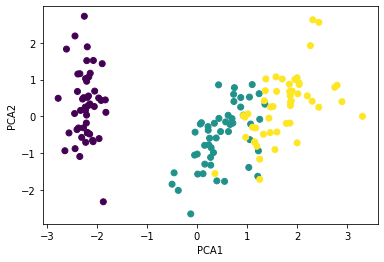

In [13]:
plt.scatter(x_new[:,0],x_new[:,1],c =y)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

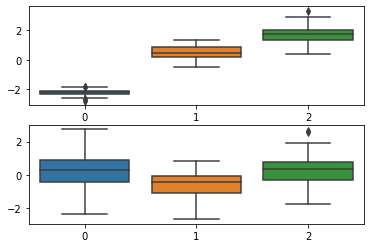

In [14]:
from pylab import *
subplot(2,1,1)
sns.boxplot(x = y, y= x_new[:,0])
subplot(2,1,2)
sns.boxplot(x = y, y = x_new[:,1])

**Part 2**:  LDA analysis and Comparison

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
x_new2 = lda.fit(x,y).transform(x)
x_new2[:5]

array([[ 8.0849532 ,  0.32845422],
       [ 7.1471629 , -0.75547326],
       [ 7.51137789, -0.23807832],
       [ 6.83767561, -0.64288476],
       [ 8.15781367,  0.54063935]])

In [16]:
lda.explained_variance_ratio_

array([0.99147248, 0.00852752])

In [17]:
lda.coef_

array([[  5.15501044,   5.29211351, -29.60911954, -16.07724638],
       [ -1.25170853,  -1.88758018,   8.1768541 ,   2.42362057],
       [ -3.9033019 ,  -3.40453332,  21.43226544,  13.65362581]])

In [18]:
lda.intercept_

array([-30.1199769 ,  -3.01700826, -18.00665296])

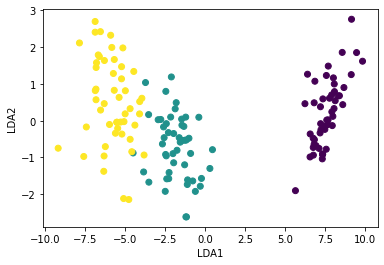

In [19]:
plt.scatter(x_new2[:,0],x_new2[:,1],c =y)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.show()

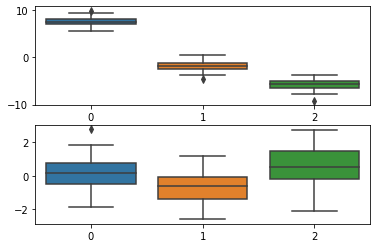

In [20]:
subplot(2,1,1)
sns.boxplot(x = y, y= x_new2[:,0])
subplot(2,1,2)
sns.boxplot(x = y, y = x_new2[:,1])

Model comparisons

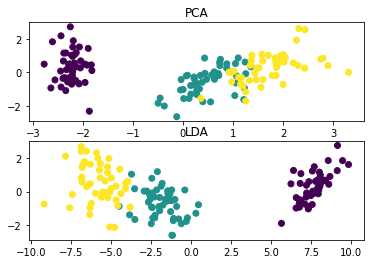

In [21]:
from pylab import *
subplot(2,1,1)
title('PCA')
plt.scatter(x_new[:,0],x_new[:,1],c=y)
subplot(2,1,2)
title('LDA')
plt.scatter(x_new2[:,0],x_new2[:,1],c=y)

Using Bayes model

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
gauss = GaussianNB()
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_new,y,test_size=0.2) #for PCA
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_new,y,test_size=0.2) #for LDA

In [29]:
#For PCA model
gauss.fit(x_train1,y_train1)
gauss.score(x_test1,y_test1)

0.8

In [27]:
#For LDA model
gauss = GaussianNB()
gauss.fit(x_train2,y_train2)
gauss.score(x_test2,y_test2)

0.9

**Part 3:** Feature Selection and Analysis

In [42]:
# Feature selection: Method 1
from sklearn.feature_selection import RFE
rfe = RFE(lda,2)
fit1 = rfe.fit(x,y)
fit1

RFE(estimator=LinearDiscriminantAnalysis(n_components=2, priors=None,
                                         shrinkage=None, solver='svd',
                                         store_covariance=False, tol=0.0001),
    n_features_to_select=2, step=1, verbose=0)

In [43]:
print("Num Features: {}".format(fit1.n_features_))
print("Selected Features: {}".format(fit1.support_))
print("Feature Ranking: {}".format(fit1.ranking_))

Num Features: 2
Selected Features: [False  True False  True]
Feature Ranking: [3 1 2 1]


In [44]:
selected_cols = []
for i in range(4):
  if fit1.support_[i] == True:
    selected_cols.append(df.columns[i+1])
selected_cols

['SepalWidthCm', 'PetalWidthCm']

In [45]:
df[selected_cols + ['target']].corr()

,SepalWidthCm,PetalWidthCm,target
SepalWidthCm,1.000000,-0.356544,-0.419446
PetalWidthCm,-0.356544,1.000000,0.956464
target,-0.419446,0.956464,1.000000


In [46]:
x = df.iloc[:,1:5]
feature1 = rfe.fit_transform(x,y)
feature1[:5]

array([[3.5, 0.2],
       [3. , 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.6, 0.2]])

In [47]:
#Feature Selection method 2
from sklearn.feature_selection import SelectKBest, chi2
skb = SelectKBest(score_func=chi2, k=2)
x = df.iloc[:,1:5]
fit = skb.fit(x, y)
fit

SelectKBest(k=2, score_func=<function chi2 at 0x7efd05dc85f0>)

In [48]:
scores = fit.scores_
scores

array([ 10.81782088,   3.59449902, 116.16984746,  67.24482759])

In [49]:
features2 = fit.transform(x)
features2[0:5,:]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [50]:
selected_cols2 = []
i = scores.argmax()   #i,j stores the indexes of 2 highest scores
selected_cols2.append(df.columns[i+1])
s1 = scores
s1[i]=0
j = s1.argmax()
selected_cols2.append(df.columns[j+1])
selected_cols2

['PetalLengthCm', 'PetalWidthCm']

In [51]:
# Applying gaussian model on feature selection by model 1
gauss = GaussianNB()
x_train,x_test,y_train,y_test = train_test_split(feature1,y)
gauss.fit(x_train,y_train)
gauss.score(x_test,y_test)

0.9473684210526315

In [52]:
from sklearn.metrics import classification_report
y_pred = gauss.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      0.92      0.92        13
           2       0.90      0.90      0.90        10

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [53]:
# Applying Gaussian model for feature selection by model 2
gauss = GaussianNB()
x_train,x_test,y_train,y_test = train_test_split(features2,y)
gauss.fit(x_train,y_train)
gauss.score(x_test,y_test)

0.9736842105263158

In [54]:
from sklearn.metrics import classification_report
y_pred = gauss.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



Correlation matrixes

In [55]:
#For PCA
df_pca = pd.DataFrame(x_new,columns = ['PC1','PC2'])
df_pca['target'] = y
df_pca.corr()

,PC1,PC2,target
PC1,1.000000e+00,5.988877e-17,0.944763
PC2,5.988877e-17,1.000000e+00,-0.014869
target,9.447635e-01,-1.486929e-02,1.000000


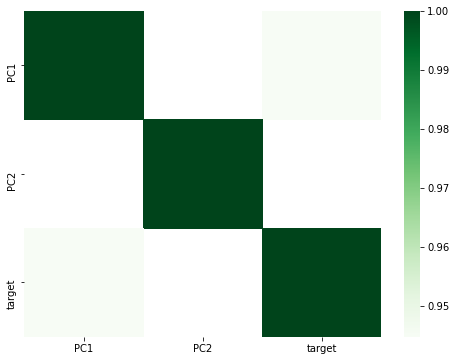

In [56]:
corr_mat = df_pca.corr().abs()
kot = corr_mat[corr_mat>=.7]
plt.figure(figsize=(8,6))
sns.heatmap(kot, cmap="Greens")

In [57]:
kot

,PC1,PC2,target
PC1,1.000000,NaN,0.944763
PC2,NaN,1.0,NaN
target,0.944763,NaN,1.000000


In [58]:
#For LDA
df_lda = pd.DataFrame(x_new2,columns = ['LDA1','LDA2'])
df_lda['target'] = y
df_lda.corr()


,LDA1,LDA2,target
LDA1,1.000000e+00,-1.811288e-15,-0.958652
LDA2,-1.811288e-15,1.000000e+00,0.106809
target,-9.586523e-01,1.068088e-01,1.000000


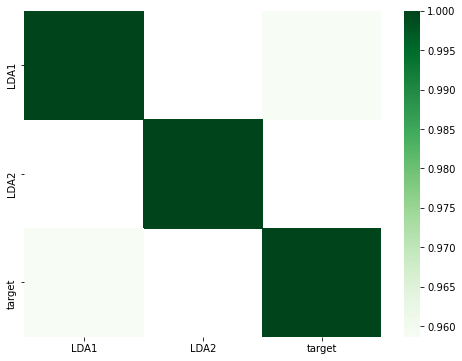

In [59]:
corr_mat = df_lda.corr().abs()
kot = corr_mat[corr_mat>=.7]
plt.figure(figsize=(8,6))
sns.heatmap(kot, cmap="Greens")

In [ ]:
kot

,LDA1,LDA2,target
LDA1,1.000000,NaN,0.958652
LDA2,NaN,1.0,NaN
target,0.958652,NaN,1.000000


In [60]:
# For RFE feature selection
df_rfe = pd.DataFrame(feature1,columns = ['RFE1','RFE2'])
df_rfe['target'] = y
df_rfe.corr()

,RFE1,RFE2,target
RFE1,1.000000,-0.356544,-0.419446
RFE2,-0.356544,1.000000,0.956464
target,-0.419446,0.956464,1.000000


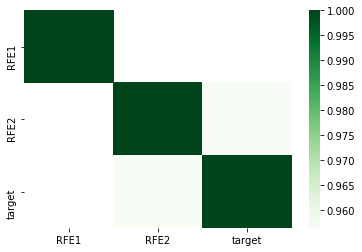

In [61]:
corr_mat = df_rfe.corr().abs()
kot = corr_mat[corr_mat>=.7]
sns.heatmap(kot, cmap="Greens")

In [62]:
kot

,RFE1,RFE2,target
RFE1,1.0,NaN,NaN
RFE2,NaN,1.000000,0.956464
target,NaN,0.956464,1.000000


In [63]:
# Feature Selection using kbest model
df_kbest = pd.DataFrame(features2,columns = ['KB1','KB2'])
df_kbest['target'] = y
df_kbest.corr()

,KB1,KB2,target
KB1,1.000000,0.962757,0.949043
KB2,0.962757,1.000000,0.956464
target,0.949043,0.956464,1.000000


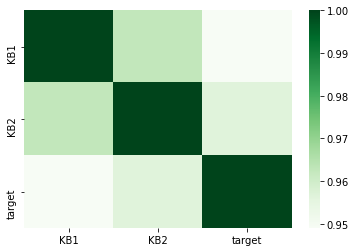

In [64]:
corr_mat = df_kbest.corr().abs()
kot = corr_mat[corr_mat>=.7]
sns.heatmap(kot, cmap="Greens")

In [65]:
kot

,KB1,KB2,target
KB1,1.000000,0.962757,0.949043
KB2,0.962757,1.000000,0.956464
target,0.949043,0.956464,1.000000
